In [1]:
import pandas as pd
import numpy as np
from analysis_src.multivariate_analysis import MultivariateAnalysis

In [21]:
df = pd.read_csv("/home/sarath_kumar/Bank_Marketing/data/bank_marketing.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [22]:
df['job'] = df['job'].fillna(df['job'].mode()[0])
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['contact'] = df['contact'].fillna(df['contact'].mode()[0])
df.drop('poutcome',axis=1,inplace = True)   

In [23]:
df2 = df.copy()

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
df['job'] = le.fit_transform(df['job'])
df['marital'] = df['marital'].map({'single':0,'married':1,'divorced':2})
df['default'] = df['default'].map({'no':0,'yes':1})
df['housing'] = df['housing'].map({'no':0,'yes':1})
df['loan'] = df['loan'].map({'no':0,'yes':1})
df['contact'] = df['contact'].map({'cellular':0,'telephone':1})
df['month'] = df['month'].map({'jan':0,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,'jul':6,'aug':7,'sep':8,'oct':9,'nov':10,'dec':11})
df['y'] = df['y'].map({'no':0,'yes':1})
df['education']= le.fit_transform(df['education'])

In [26]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'y'],
      dtype='object')

In [27]:
analysis= MultivariateAnalysis(df)

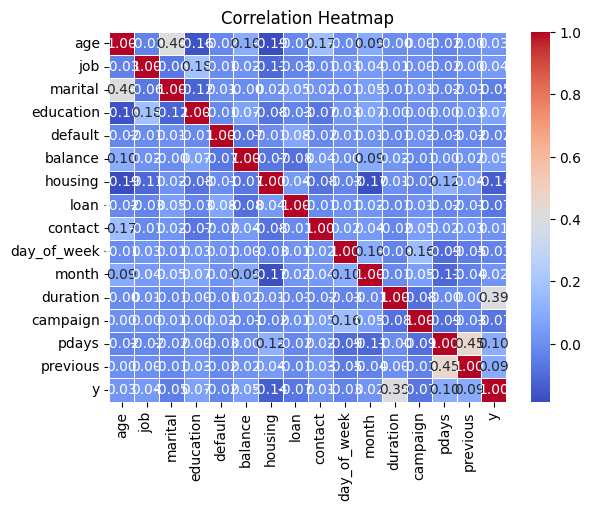

In [28]:
analysis.correlation_heatmap()

In [44]:
analysis = MultivariateAnalysis(df)

/tmp/ipykernel_577229/3506162435.py:69: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=self.df, x=x, y=y, size=size, hue=hue, sizes=(10, 100), alpha=0.6, palette='viridis',


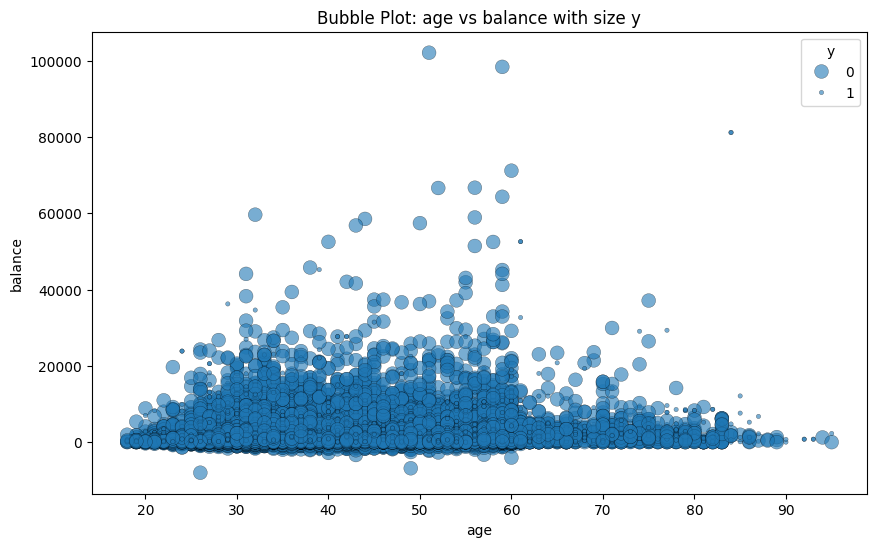

In [45]:
analysis.bubble_plot('age','balance','y')

/tmp/ipykernel_577229/3506162435.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.df, x=categorical, y=numerical, palette='Set3')


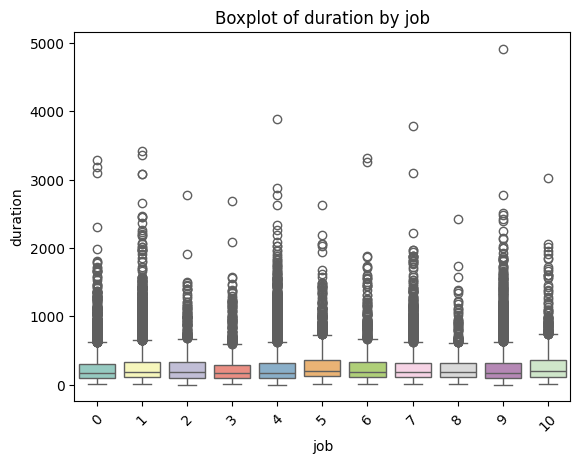

In [47]:
analysis.boxplot_by_category('job','duration')

/tmp/ipykernel_575334/919267757.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x=categorical, y=numerical, palette='pastel')


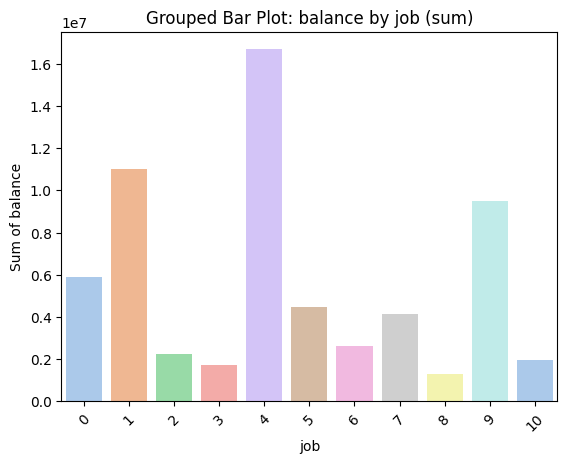

In [8]:
analysis.grouped_bar_plot('job','balance',aggfunc='sum')